In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [7]:
"""
This program converts 
a portion of the Corine 
Land Cover map (ground 
geometry view) 
to a map containing the 
same information but 
adapted to a radar geometry.
"""

'\nThis program converts \na portion of the Corine \nLand Cover map (ground \ngeometry view) \nto a map containing the \nsame information but \nadapted to a radar geometry.\n'

In [12]:
import matplotlib.pylab as plt 
import numpy as np
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/bettik/boudaose/FINAL_SCRIPTS/') 
import USED_FUNCTIONS_2 as UF


# PATHS
#post = "local"
post = "cluster"

if ( post == 'local' ) :
    path_r     = f"/home/zwartholm/Desktop/Stages/STAGE/Data/" 
    path_slc   = path_r # (here the same) 
    path_dates = f"/home/zwartholm/Desktop/Stages/STAGE/Data/"
    path_geom  = f"/home/zwartholm/Desktop/Stages/STAGE/Data/"
elif ( post == 'cluster' ) : 
    path_r     = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/" 
    path_slc   = path_r # (here the same) 
    path_dates = f"/summer/deformalpes/ARCHIVE/pauline/SAUV_D139_2021/iw2/iw2/"
    path_geom  = f"/bettik/doinm/ALPS/D139/TMP/"

#################################################################################################


In [20]:
###################################################################

#-----------------------------------------------------------
import numpy as np
from array import array
#-----------------------------------------------------------
NCol, NRow = 1703, 3175 
# print(NCol * NRow)
path = path_r + f"Croped_Frame/Frame.tif" 
# print(path) 
#-----------------------------------------------------------
# Reading (step to optimize)
TYP = 'b' # <-- 1 Byte 
nbbytes = 1
f = open( path  , 'rb')
# Size in bytes - NCol*NRow
f.seek( 5288*1 , 0 )     
float_array = array( TYP ) 
float_array.frombytes(f.read(  ) ) # on columns
f.close() 
#-----------------------------------------------------------
Frame = np.reshape( float_array, (NRow, NCol) , order='C') 

def getColorOfTheSLC( C0slc, L0slc ) :
    """
    Input : the slc pixel coordinated
    output: the Corine Land Cover Label (color)
    """
    #-----------------------------------------------------------
    # The crop coordinates (in the CLC map)
    Origin     = (4.939428227744479,46.839927998509708) # X  & Y
    # The step of the crop (from CLC map)
    Pixel_Size = (0.001280602116034,-0.001280602116034) # dX & xY
    Lon_0 = Origin[0]
    Lat_0 = Origin[1]
    dLon  = Pixel_Size[0]
    dLat  = Pixel_Size[1]
    #-----------------------------------------------------------
    square   = (1, 1) 
    # Get the terrain coordinates of the slc point
    LONslc, LATslc = UF.Radar_Terrain_BIL( C0slc, L0slc, square )[1:] 
    #-----------------------------------------------------------
    C0clc = int(round(( LONslc - Lon_0 )/dLon)) 
    L0clc = int(round(( LATslc - Lat_0 )/dLat)) 
    #-----------------------------------------------------------
    LabelColor = int(Frame[L0clc, C0clc]) 
    
    return LabelColor 


In [21]:
"""
import numpy as np
import matplotlib.pylab as plt 
#%matplotlib inline

Ran, Azi = 20636, 15219     # Top-Left of the General map. (Harmaliere)
#RanSHP, AziSHP= 6400, 1600 
C0 = (Ran-Ran%100) - 200*4
L0 = (Azi-Azi%100) - 200
SHP = 406

"""

'\nimport numpy as np\nimport matplotlib.pylab as plt \n#%matplotlib inline\n\nRan, Azi = 20636, 15219     # Top-Left of the General map. (Harmaliere)\n#RanSHP, AziSHP= 6400, 1600 \nC0 = (Ran-Ran%100) - 200*4\nL0 = (Azi-Azi%100) - 200\nSHP = 406\n\n'

Get the correspondence # Terrain -> Radar: 
 ([5.666666666666667, 44.93333333333333], 20636, 15219)
Verification of reciprocal correspondence: 
 ([20636, 15219], 5.6666717529296875, 44.93330764770508)
C0  , L0   :  19800 15000
Context Coordinates : C0pp, L0pp :  19800 15000
Context Dimensions : Imgt100 :  1600 400
C00 , L00  :  0 0


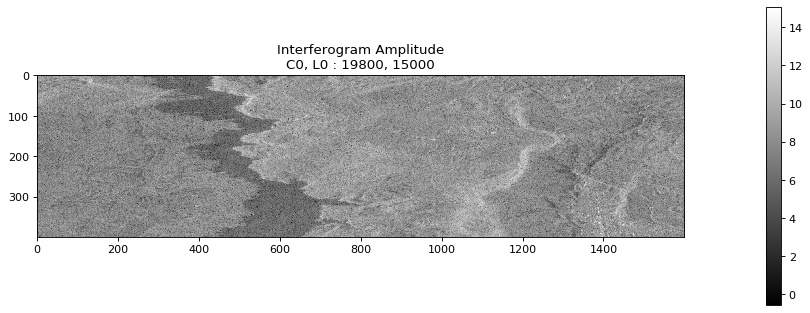

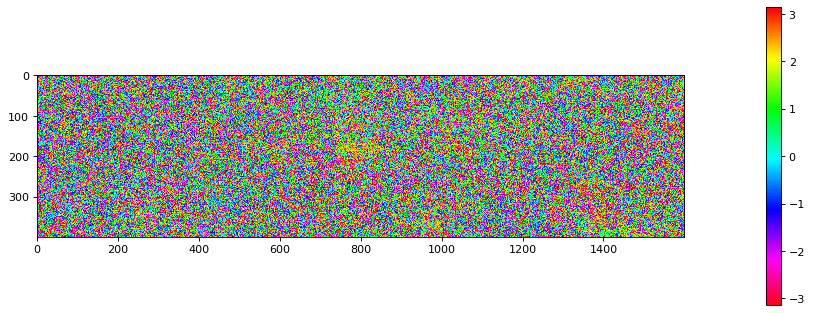

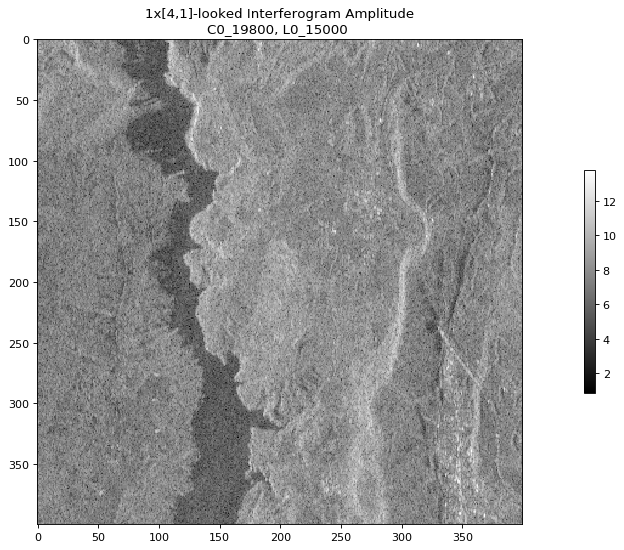

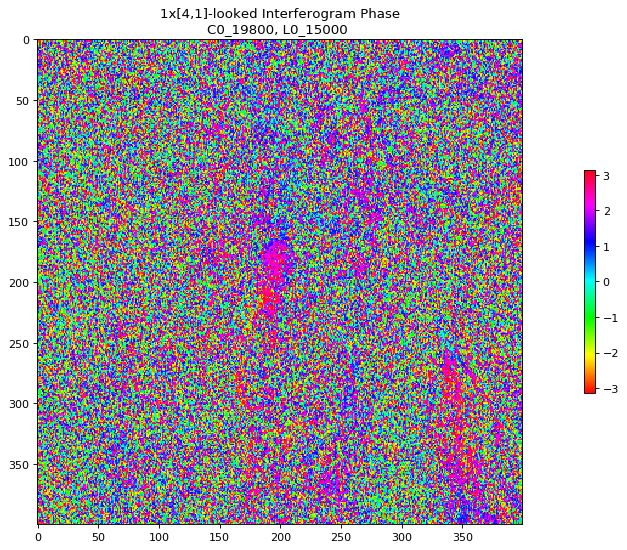

Make a test for a pixel:
 24
SLColor Shape : (400, 1600, 2)
Ran   & Azi   :  20636 15219
C0slc & L0slc :  19800 15000 	 Modulo[100]
Nb of operations to be done :  640000
0.0 % of progression
0.25 % of progression
0.5 % of progression
0.75 % of progression
1.0 % of progression
1.25 % of progression
1.5 % of progression
1.7500000000000002 % of progression
2.0 % of progression
2.25 % of progression
2.5 % of progression
2.75 % of progression
3.0 % of progression
3.25 % of progression
3.5000000000000004 % of progression
3.75 % of progression
4.0 % of progression
4.25 % of progression
4.5 % of progression
4.75 % of progression
5.0 % of progression
5.25 % of progression
5.5 % of progression
5.75 % of progression
6.0 % of progression
6.25 % of progression
6.5 % of progression
6.75 % of progression
7.000000000000001 % of progression
7.249999999999999 % of progression
7.5 % of progression
7.75 % of progression
8.0 % of progression
8.25 % of progression
8.5 % of progression
8.75 % of progression


84.75 % of progression
85.0 % of progression
85.25 % of progression
85.5 % of progression
85.75 % of progression
86.0 % of progression
86.25 % of progression
86.5 % of progression
86.75 % of progression
87.0 % of progression
87.25 % of progression
87.5 % of progression
87.75 % of progression
88.0 % of progression
88.25 % of progression
88.5 % of progression
88.75 % of progression
89.0 % of progression
89.25 % of progression
89.5 % of progression
89.75 % of progression
90.0 % of progression
90.25 % of progression
90.5 % of progression
90.75 % of progression
91.0 % of progression
91.25 % of progression
91.5 % of progression
91.75 % of progression
92.0 % of progression
92.25 % of progression
92.5 % of progression
92.75 % of progression
93.0 % of progression
93.25 % of progression
93.5 % of progression
93.75 % of progression
94.0 % of progression
94.25 % of progression
94.5 % of progression
94.75 % of progression
95.0 % of progression
95.25 % of progression
95.5 % of progression
95.75 % of

In [22]:
#%%time
###############################################################################
# Terrain -> Radar
#Lon, Lat = 5.91856, 45.30093 # Grenoble 
#Lon, Lat = 6.013, 45.647      # Chambery (Longitude & Latitude)
# Harmaliere
Lat = 44+(56/60) 
Lon = 5 +(40/60) 
square   = (1, 1) # Here it's 'one' point (optionally, it can be an array)
print( "Get the correspondence # Terrain -> Radar: \n", UF.Terrain_Radar_BIL( Lon, Lat, square )  ) 

# Radar -> Terrain
Ran, Azi = UF.Terrain_Radar_BIL( Lon, Lat, square )[1:] 
square   = (1, 1) 
print( "Verification of reciprocal correspondence: \n", UF.Radar_Terrain_BIL( Ran, Azi, square )) 
###############################################################################
# INPUT PARAMETERS (USER) 
# Shift the top-left and extract (to center the researched point )
shifting      = 200         # User dependant parameter
#Ran, Azi      = Ran-int(shifting*4), Azi-int(shifting) #  
#C0, L0        = Ran, Azi    # Upper-Left of the whole image
#
Ran, Azi = 20636, 15219     # Top-Left of the General map. (Harmaliere)
#RanSHP, AziSHP= 6400, 1600 
C0 = (Ran-Ran%100) - shifting*4 
L0 = (Azi-Azi%100) - shifting   
SHP = 400
#
date1         = 20170701    # just an arbitrary date 
date2         = 20170713    # just an arbitrary date
Imgt          = [12,3]      # crop of the patch (imagette) 
Cntx          = [ SHP*4 , SHP ] # Context is the whole interpolated area 
# Extraction 
ExtractedData = UF.InterferoContextCrop( C0, L0, 
               date1, date2 , 
               Imgt, 
               CONTEXT=Cntx  ) 
###############################################################################
###############################################################################
Z = ExtractedData[0] # We are only interested in the first arg (ie: The whole context)
a = Z [:,:]          # We look to the whole context 
i = 1 # Scaling the kernel size of the multilook (i>1 will be a terrain shrunk geometry )
# MultiLooking (4-looks on Range, 1-look on Azimut)
a = UF.pooling( a, ksize=(i*1,i*4), method='mean', pad=False ) 
# Showing original interferograms (Radar Geometry)
# The Amplitude of the Interferogram
UF.ShowAmpPhz( np.log(np.absolute(Z)), 
       title='Interferogram Amplitude', 
       date=f'C0, L0 : {C0-C0%100}, {L0-L0%100}' ) 
# The Phase of the Interferogram
UF.ShowAmpPhz((np.angle(Z)) ,
           cmap='hsv_r' ) 
# Showing multi-looked interferograms (Terrain Geometry)
# The Amplitude of the Interferogram
UF.ShowAmpPhz(  np.log(np.absolute(a)),
       title=f'{i}x[4,1]-looked Interferogram Amplitude', 
       date=f'C0_{C0-C0%100}, L0_{L0-L0%100} ',
       cmap='gray', size=9.0 ) 
# The Phase of the Interferogram
UF.ShowAmpPhz( (np.angle(a)),
       title=f'{i}x[4,1]-looked Interferogram Phase',
       date=f'C0_{C0-C0%100}, L0_{L0-L0%100} ',
       cmap='hsv', size=9.0 ) 
###############################################################################
C0slc, L0slc = Ran, Azi
print("Make a test for a pixel:\n", getColorOfTheSLC( C0slc, L0slc )) 
###############################################################################
# I initialize an array to store Ran & Azi values
SLColor = np.zeros( ( Z.shape[0], Z.shape[1], 2 ) ) 
# Varifying shapes
print("SLColor Shape :", SLColor.shape) 
# Getting 'nicer' crops (optional)
C0slc, L0slc = C0, L0
# Verifying the difference
print("Ran   & Azi   : ", Ran  , Azi  ) 
print("C0slc & L0slc : ", C0slc, L0slc , "\t Modulo[100]" ) 
# Storing Ran and Azi positions into an array
for i in range( Z.shape[0] ) : # rows 
    for j in range( Z.shape[1] ) : # columns 
        SLColor[i,j] = L0slc+i, C0slc+j  

###############################################################################
# Initlize an array to store the new CLC map
CLC = np.zeros( (Z.shape[0], Z.shape[1]) )
# Here the 'pourcent' variable to monitoring the progression
pourcent = Z.shape[0]*Z.shape[1] 
print( "Nb of operations to be done : ", 
      pourcent )
# The Mapping process
s = 0
for i in range( Z.shape[0] ) : # rows 
    print( (s/pourcent)*100. , "% of progression")   
    for j in range( Z.shape[1] ) : # columns 
        s += 1
        # Here we use the function that gets every pixel's CLC color
        CLC[i,j] = getColorOfTheSLC( int(SLColor[i,j,1]), int(SLColor[i,j,0]) ) 
###############################################################################

Get the correspondence # Terrain -> Radar: 
 ([5.666666666666667, 44.93333333333333], 20636, 15219)
Verification of reciprocal correspondence: 
 ([20636, 15219], 5.6666717529296875, 44.93330764770508)
C0, L0 : 19800 15000
Cst : 0
C0 - Cst : 19800
Cmod1 : 0 Lmod1 : 0
C0p : 19800 L0p : 15000
Cmod2 : 0
C0pp : 19800 L0pp : 15000
C00 : 0
Lmod1 : 0
C0  , L0   :  19800 15000
Context Coordinates : C0pp, L0pp :  19800 15000
Context Dimensions : Imgt100 :  1600 400
C00 , L00  :  0 0


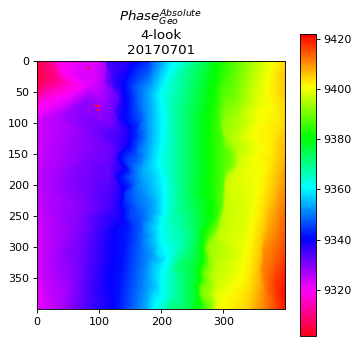

 Q (absolute) : (400, 400)


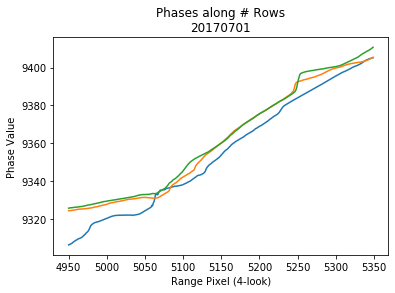

Abscisses   :  400
MatrixRadar :  (400, 400) 
yinterp     :  1600


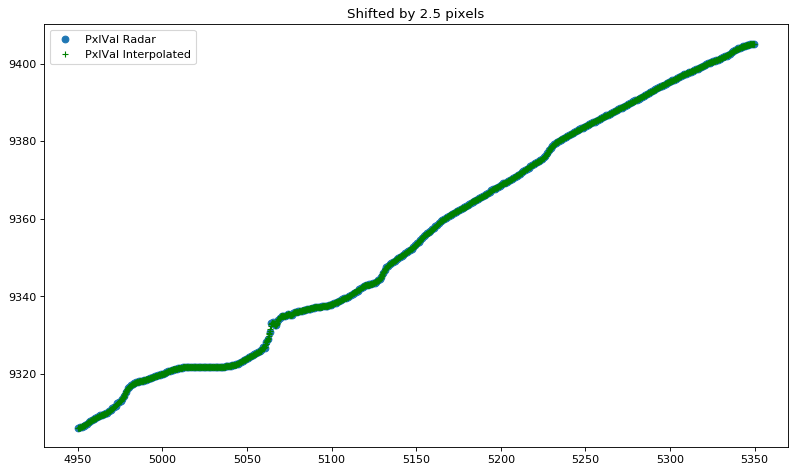

Abscisses   :  400
MatrixRadar :  (400, 1600) 
yinterp     :  1600


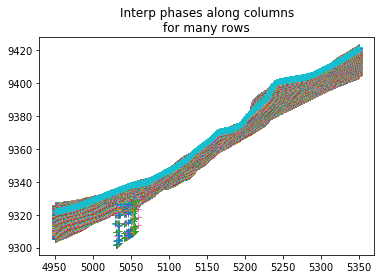

(400, 1600)
(400, 1600)


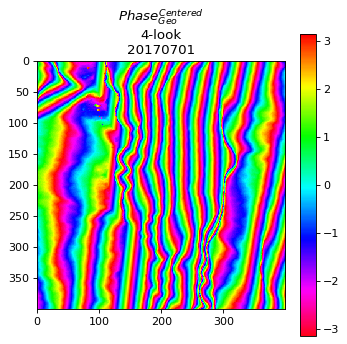

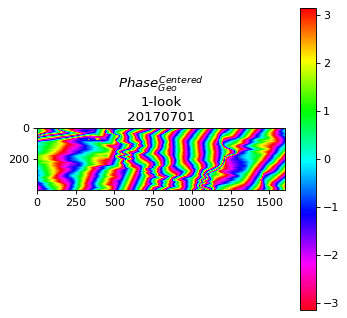

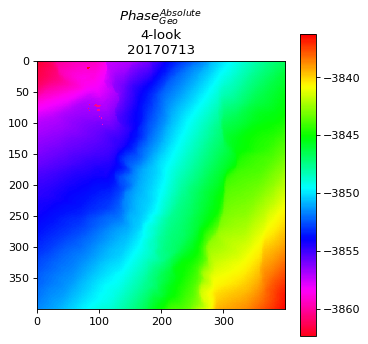

 Q (absolute) : (400, 400)


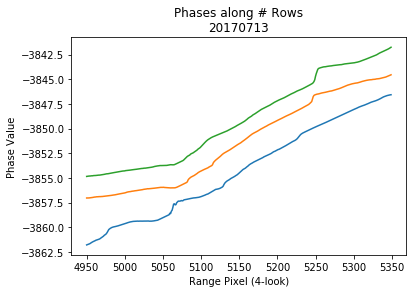

Abscisses   :  400
MatrixRadar :  (400, 400) 
yinterp     :  1600


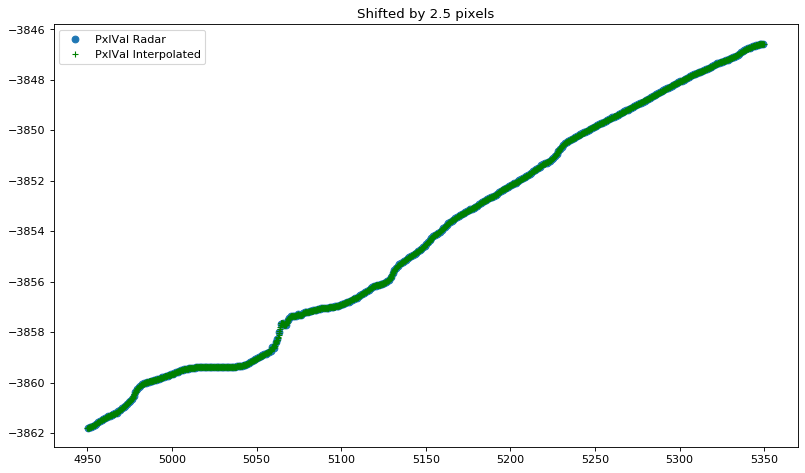

Abscisses   :  400
MatrixRadar :  (400, 1600) 
yinterp     :  1600


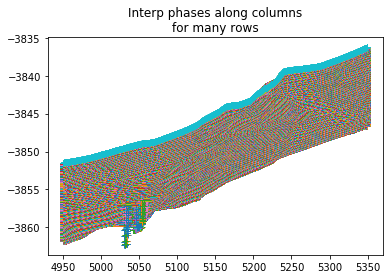

(400, 1600)
(400, 1600)


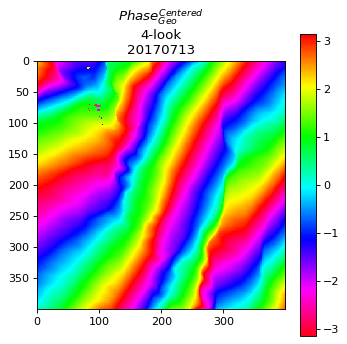

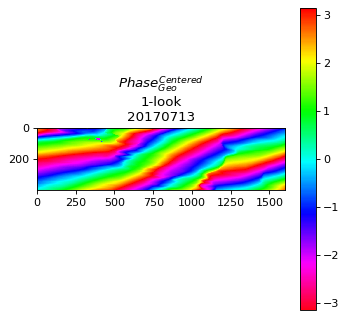

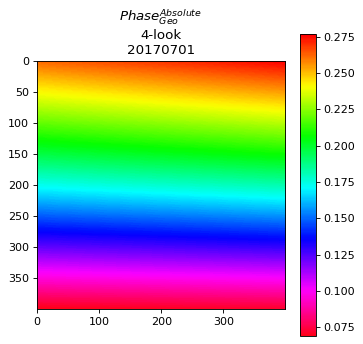

 Q (absolute) : (400, 400)


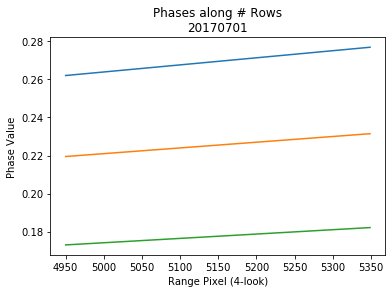

Abscisses   :  400
MatrixRadar :  (400, 400) 
yinterp     :  1600


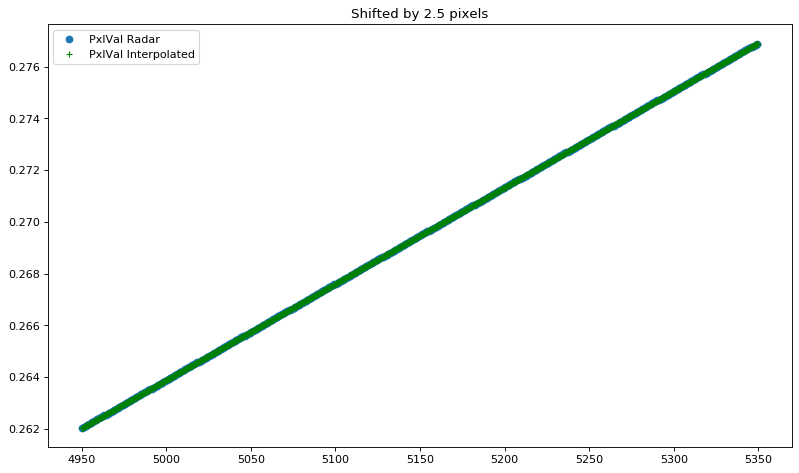

Abscisses   :  400
MatrixRadar :  (400, 1600) 
yinterp     :  1600


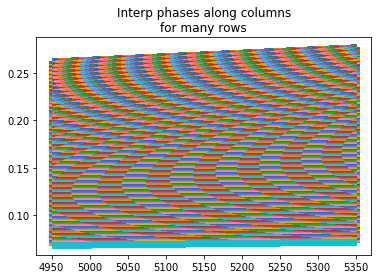

(400, 1600)
(400, 1600)


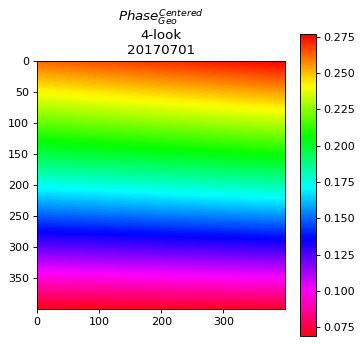

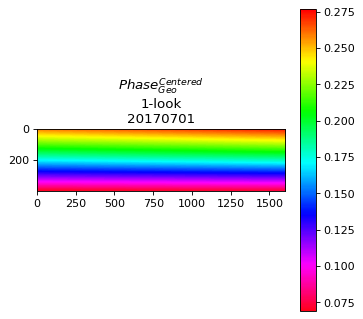

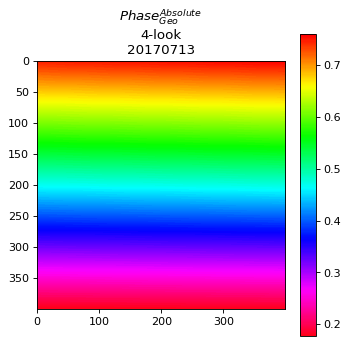

 Q (absolute) : (400, 400)


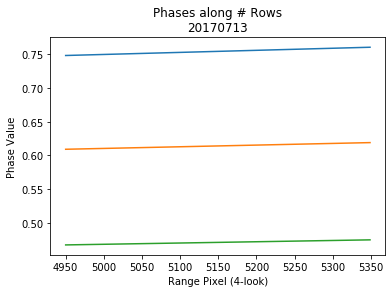

Abscisses   :  400
MatrixRadar :  (400, 400) 
yinterp     :  1600


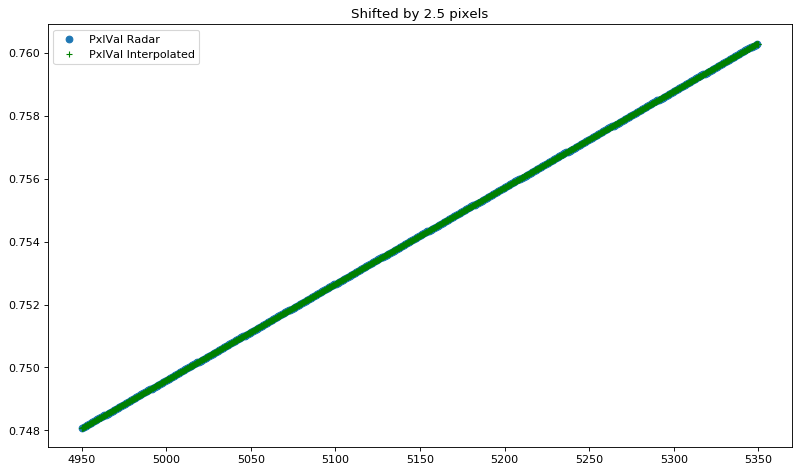

Abscisses   :  400
MatrixRadar :  (400, 1600) 
yinterp     :  1600


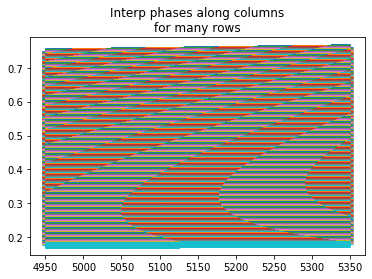

(400, 1600)
(400, 1600)


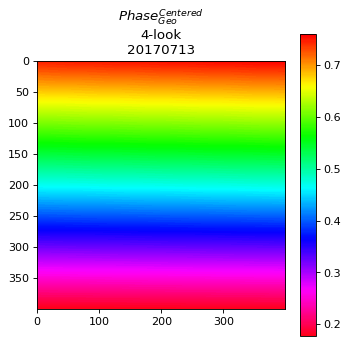

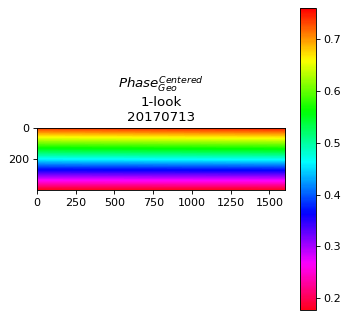

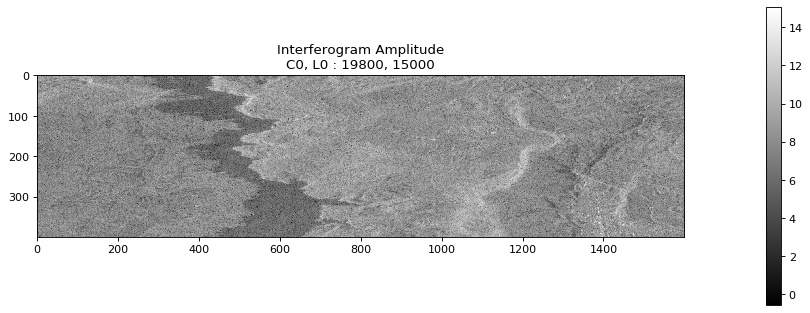

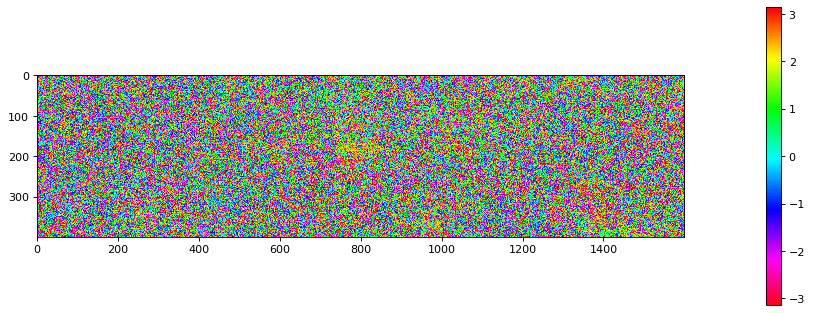

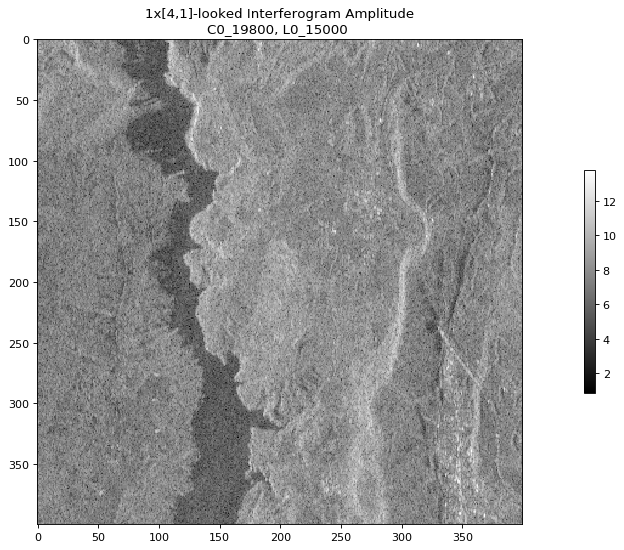

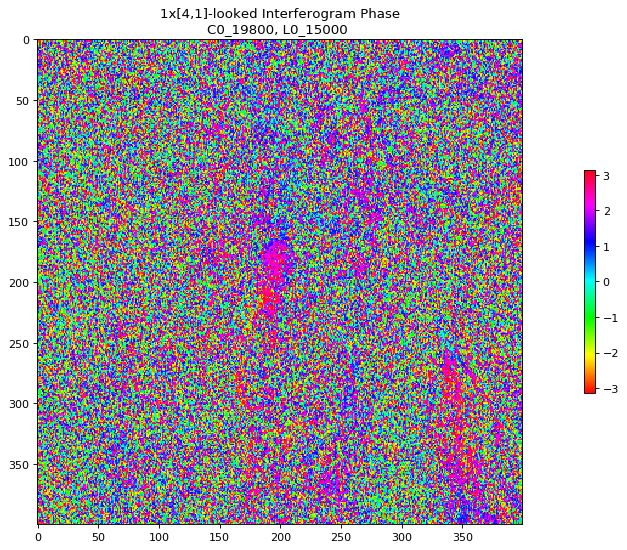

Make a test for a pixel:
 24
SLColor Shape : (400, 1600, 2)
Ran   & Azi   :  20636 15219
C0slc & L0slc :  19800 15000 	 Modulo[100]
Nb of operations to be done :  640000
0.0 % of progression
0.25 % of progression
0.5 % of progression
0.75 % of progression
1.0 % of progression
1.25 % of progression
1.5 % of progression
1.7500000000000002 % of progression
2.0 % of progression
2.25 % of progression
2.5 % of progression
2.75 % of progression
3.0 % of progression
3.25 % of progression
3.5000000000000004 % of progression
3.75 % of progression
4.0 % of progression
4.25 % of progression
4.5 % of progression
4.75 % of progression
5.0 % of progression
5.25 % of progression
5.5 % of progression
5.75 % of progression
6.0 % of progression
6.25 % of progression
6.5 % of progression
6.75 % of progression
7.000000000000001 % of progression
7.249999999999999 % of progression
7.5 % of progression
7.75 % of progression
8.0 % of progression
8.25 % of progression
8.5 % of progression
8.75 % of progression


84.75 % of progression
85.0 % of progression
85.25 % of progression
85.5 % of progression
85.75 % of progression
86.0 % of progression
86.25 % of progression
86.5 % of progression
86.75 % of progression
87.0 % of progression
87.25 % of progression
87.5 % of progression
87.75 % of progression
88.0 % of progression
88.25 % of progression
88.5 % of progression
88.75 % of progression
89.0 % of progression
89.25 % of progression
89.5 % of progression
89.75 % of progression
90.0 % of progression
90.25 % of progression
90.5 % of progression
90.75 % of progression
91.0 % of progression
91.25 % of progression
91.5 % of progression
91.75 % of progression
92.0 % of progression
92.25 % of progression
92.5 % of progression
92.75 % of progression
93.0 % of progression
93.25 % of progression
93.5 % of progression
93.75 % of progression
94.0 % of progression
94.25 % of progression
94.5 % of progression
94.75 % of progression
95.0 % of progression
95.25 % of progression
95.5 % of progression
95.75 % of

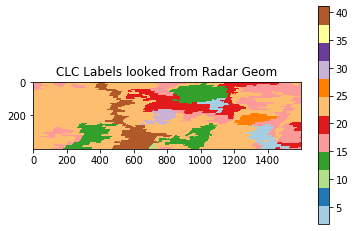

In [23]:
plt.imshow( CLC[:,:], cmap='Paired' ) 
plt.colorbar() 
plt.savefig( "CLCcalculated.png" )
plt.title( "CLC Labels looked from Radar Geom" )
plt.show() 
#plt.pause(20)
plt.close() 


In [24]:

# Save the new CLC map (projected on radar geometry)
filename = f'CLC_Ran-Azi_{C0}_{L0}_Shapes_{CLC.shape[0]}_{CLC.shape[1]}.dat' 
with open( filename, 'wb') as f:
    np.save(f, CLC ) 

In [25]:
# If we want to open what we just saved

filename = f'CLC_Ran-Azi_{C0}_{L0}_Shapes_{CLC.shape[0]}_{CLC.shape[1]}.dat' 
with open( filename, 'rb') as f:
    a = np.load(f) 


In [26]:
CLC = a

In [27]:
sl = sorted(list(set( a.flatten())))

In [28]:
CLCsquare = np.zeros([CLC.shape[0], int(CLC.shape[1]/4) ]) 
for i in range( CLC.shape[0] ) : 
    for j in range( 0, CLC.shape[1], 4 ) : 
        CLCsquare[i,int(j/4)] = CLC[i,j]  # to store CLC values
        #CLCsquare[i,int(j/4)] = sl.index(CLC[i,j]) # To store enumerated used values


In [29]:
CLCsquare.shape

(400, 400)

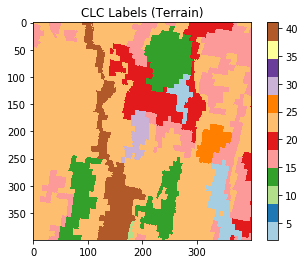

In [30]:
plt.imshow( CLCsquare, cmap='Paired' ) 
plt.colorbar() 
plt.savefig( "CLCHarmaSquare.png" ) 
plt.title( "CLC Labels (Terrain)" ) 
plt.show() 
#plt.pause(20) 
plt.close() 


In [31]:
"""
# Save the new CLC map (projected on terrain geometry)
filename = f'CLCSquare_Ran-Azi_{C0}_{L0}_Shapes_{CLC.shape[0]}_{CLC.shape[1]}.dat' 
with open( filename, 'wb') as f:
    np.save(f, CLCsquare ) 
"""